# 3次元座標系

In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

## 3次元位置
`numpy.array([x,y,z])` として3次元のベクトルを作ります。

`from numpy import array as npa` となっているので `npa` と書けます。

In [2]:
pos = npa([1, 2, 3])

In [3]:
pos

array([1, 2, 3])

In [4]:
v0 = npa([1, 1, 0])
v1 = npa([2, 2, -2])

In [6]:
v0 + v1

array([ 3,  3, -2])

In [7]:
3 * v0

array([3, 3, 0])

## 3次元の回転
3次元の回転は3x3行列で表されます。

3要素のリスト３つのリストとして 3x3行列を作ります。

In [8]:
rot = npa([[1,0,0],[0,1,0],[0,0,1]])

In [9]:
rot

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

### クオータニオン

In [10]:
q = IC.rotationToQuaternion(rot)

In [11]:
q

array([0., 0., 0., 1.])

### AngleAxis

In [12]:
arot = IC.angleAxisNormalized(PI/3, npa([1, 0, 0]))

In [13]:
arot

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.5      , -0.8660254],
       [ 0.       ,  0.8660254,  0.5      ]])

## 3次元の座標系
以下の資料を参照してください。

[3次元座標系の説明](https://irsl-tut.github.io/irsl_documents/ja/coordinates.html)

[pythonでのcoordinatesの使い方](https://irsl-tut.github.io/irsl_documents/ja/module_cnoid_irslcoords.html#class-cnoid-irslcoords-coordinates)

### 座標系の生成

In [14]:
cds = coordinates(pos, rot)

In [15]:
cds

<coordinates[0x563c7272e340] 1 2 3 / 0 0 0 1 >

In [16]:
cds.rot = arot

In [17]:
cds

<coordinates[0x563c7272e340] 1 2 3 / 0.5 0 0 0.866025 >

### 座標系の移動、回転

In [18]:
cds2 = coordinates()

In [19]:
cds2.translate(npa([0, 1, 0]))

<coordinates[0x563c71e0ab50] 0 1 0 / 0 0 0 1 >

In [20]:
cds2.rotate(PI/3, npa([1, 0, 0]))

<coordinates[0x563c71e0ab50] 0 1 0 / 0.5 0 0 0.866025 >

### 座標系の表示

#### 表示用のオブジェクト
DrawCoordsを使う。

`from irsl_choreonoid.draw_coords import DrawCoordsListWrapped as DrawCoords` となっている。

In [21]:
dc = DrawCoords(length=0.5, width=5)

In [22]:
org = coordinates()

#### addCoords

In [23]:
dc.addCoords(org)

1

In [24]:
dc.addCoords(cds2)

2

#### 画面のファイル化
`%display` とすると、表示画面がnotebookにダウンロードできます。

これはpythonのコマンドではありません。

本講義のchoreonoidを使ったjupyterのみで使えるコマンドです。

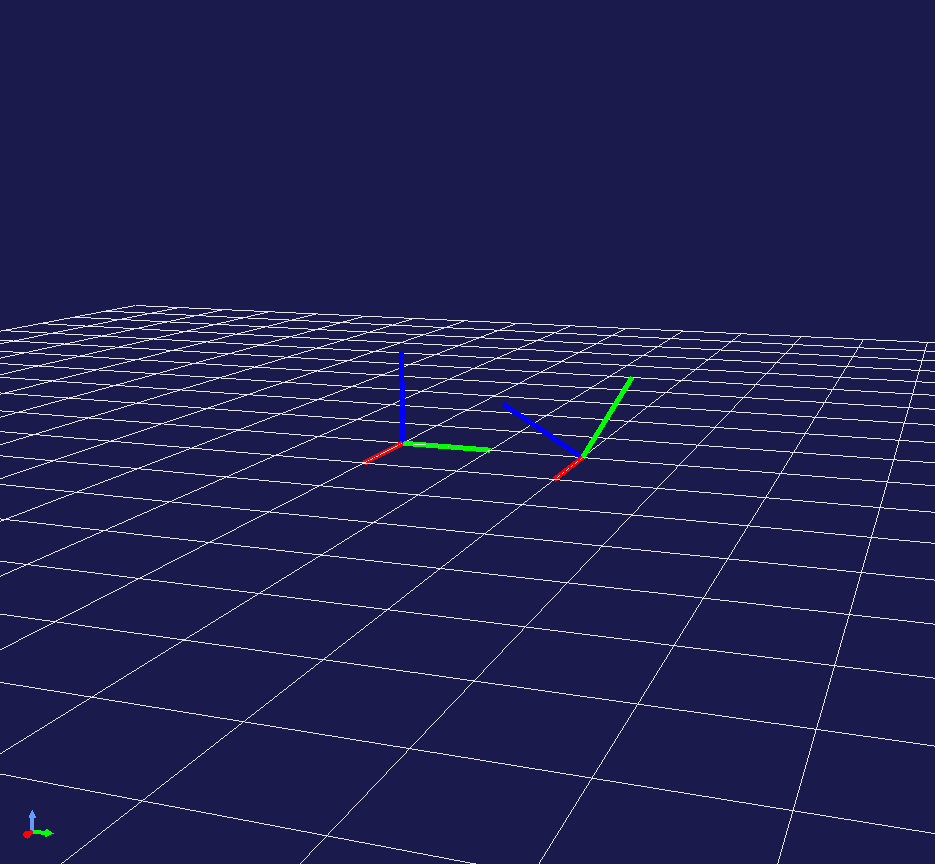

In [25]:
%display

#### 座標系の表示を消す

In [26]:
dc.reset()

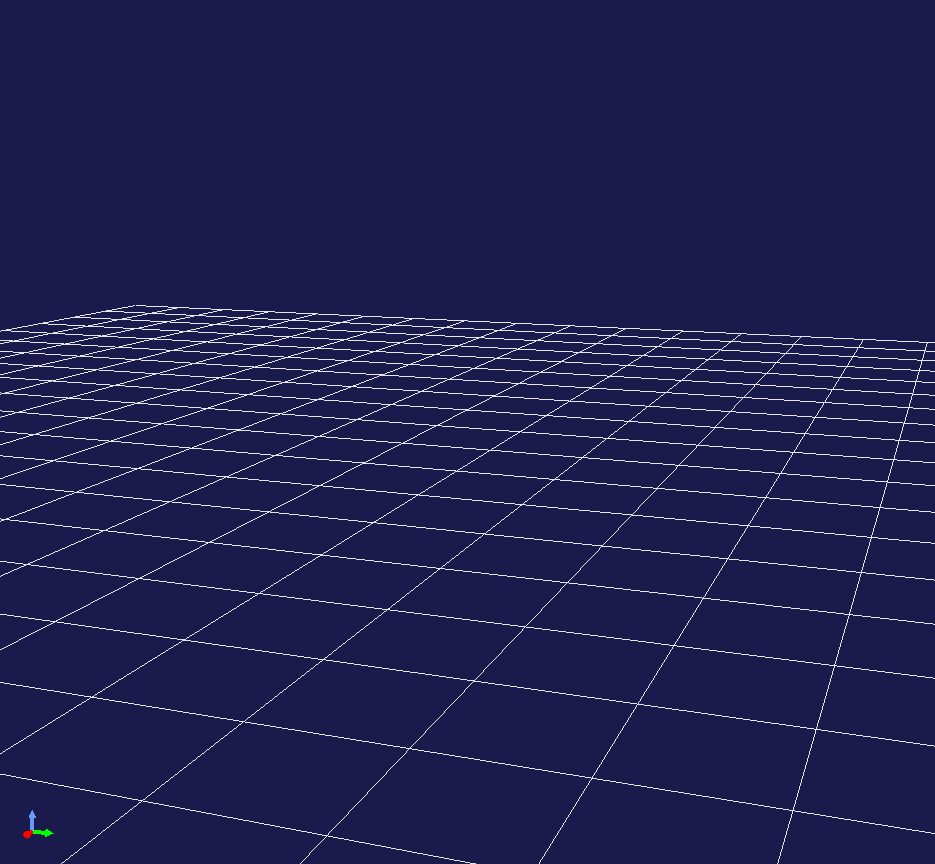

In [27]:
%display

#### 座標系の表示の移動
dc を、translate, rotate, transform, newcoords のメソッドで位置を変更すると、表示座標系の基準を移動させることができる。

In [28]:
cds2.translate(npa([0, 0.5, 0.5]))

<coordinates[0x563c71e0ab50] 0 0.816987 0.683013 / 0.5 0 0 0.866025 >

In [29]:
dc.addCoords(cds2)

1

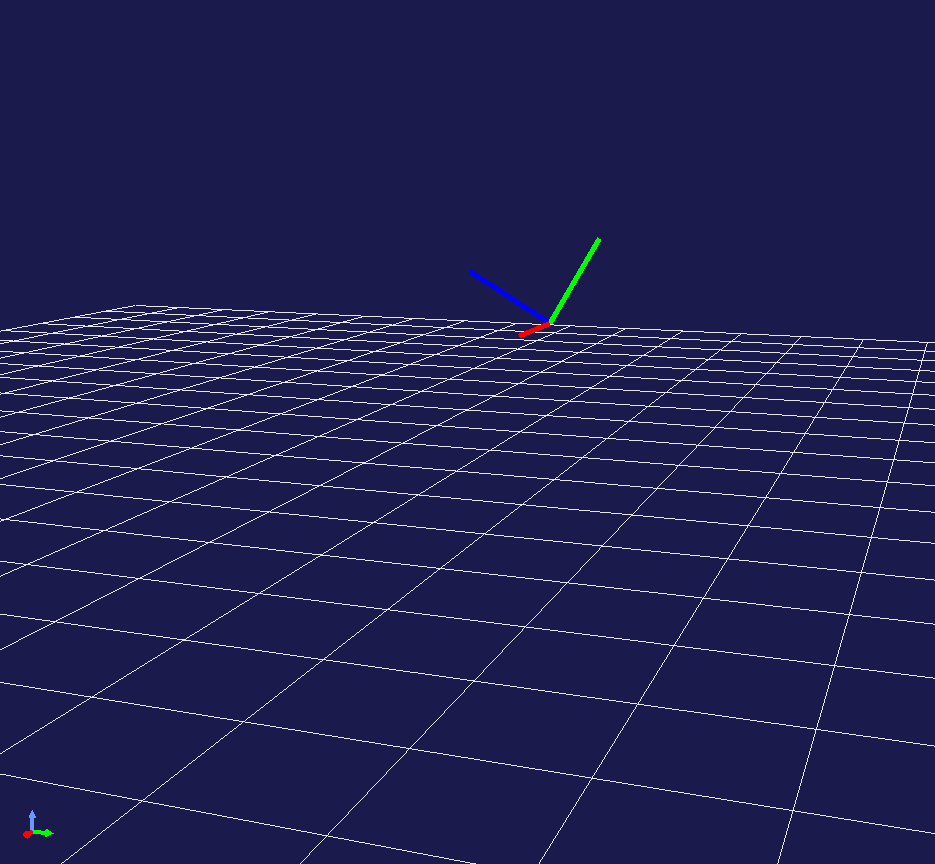

In [30]:
%display

In [31]:
dc.translate(npa([0, 0, 0.6]))

Wrap <class 'irsl_choreonoid.draw_coords.DrawCoordsListWrapped'> : <coordinates[0x563c70cf22e0] 0 0 0.6 / 0 0 0 1 >

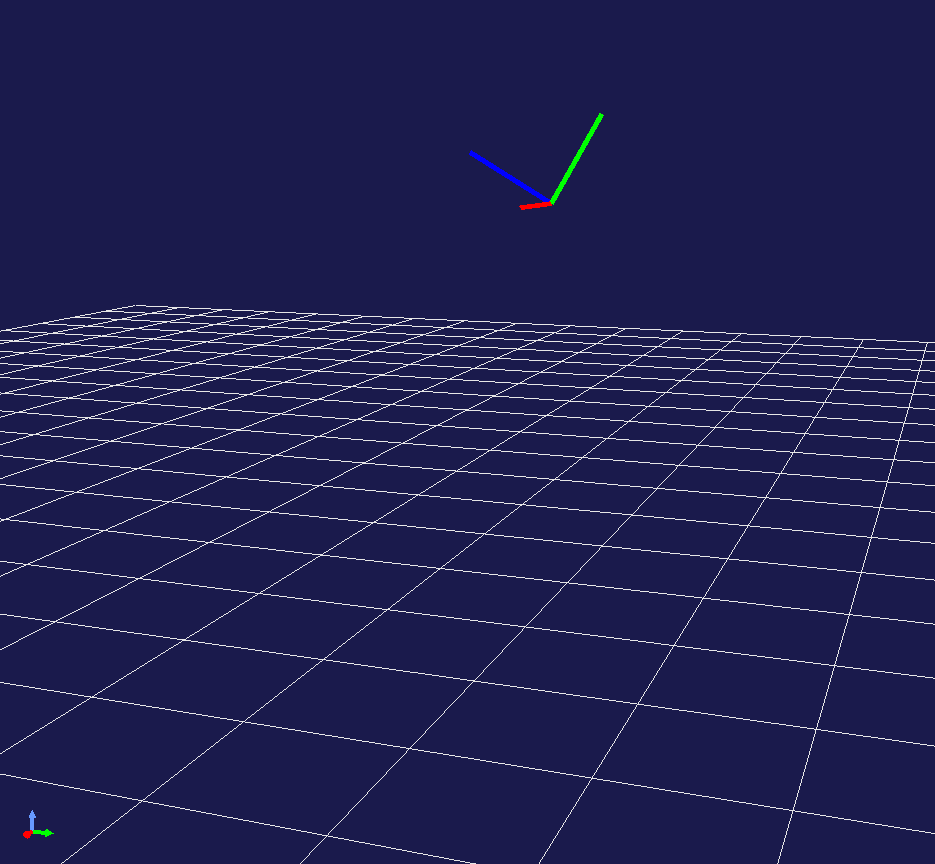

In [32]:
%display